In [1]:

import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
from sklearn.cross_validation import train_test_split
from random import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer

%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools

#matrix inverse
from numpy.linalg import inv

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
def get_ml_data(dat, patid, test_size = 0.2, if_stimulated = 'all', if_itd = True, norm = 0):
    dat = dat.loc[dat.loc[:,'patid'] == patid]
    y = dat.loc[:,'label']
    drop_list = ['label', 'region_start_time', 'patid']
    X = dat.drop(drop_list, axis = 1, inplace = False)
    y=y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    normalizer = preprocessing.Normalizer().fit(X_train)
    if norm:
        X_train = normalizer.transform(X_train)
        X_test = normalizer.transform(X_test)    

    return X_train, X_test, y_train, y_test






In [3]:
def show_result(y_pred, df, clf_name = '', if_save = 0):
    heldout_scr = accuracy_score(y_test, y_pred)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    JJ.plot_confusion_matrix(cnf_matrix, title = clf_name, if_save = if_save)
    cols_to_keep = ['params', 'mean_test_score']
    df_toshow = df[cols_to_keep].fillna('-')
    df_toshow = pd.DataFrame(df_toshow.sort_values(by=["mean_test_score"],  ascending=False))
    display(df_toshow)
    return df_toshow

In [4]:
import pickle
data = pickle.load( open( "../data/ml_ready_data.p", "rb" ) )

In [12]:
X_train

array([[  3.53847912e-01,   3.51341012e-01,   3.54285161e-01, ...,
          1.30323392e-06,   1.17291053e-05,   1.30323392e-06],
       [  3.52728366e-01,   3.53109605e-01,   3.54835178e-01, ...,
          0.00000000e+00,   7.83930861e-06,   1.30655144e-06],
       [  3.53705793e-01,   3.51545611e-01,   3.54384665e-01, ...,
          0.00000000e+00,   1.30347260e-05,   0.00000000e+00],
       ..., 
       [  3.52637218e-01,   3.53152866e-01,   3.54791541e-01, ...,
          0.00000000e+00,   9.14877048e-06,   1.30696721e-06],
       [  3.53799534e-01,   3.51570458e-01,   3.54295228e-01, ...,
          0.00000000e+00,   1.17327164e-05,   0.00000000e+00],
       [  3.52733969e-01,   3.53151666e-01,   3.54750512e-01, ...,
          0.00000000e+00,   6.53540426e-06,   0.00000000e+00]])

In [13]:
X_train, X_test, y_train, y_test = get_ml_data(data, '231', norm = 0)

In [11]:
display(pd.DataFrame(X_train))

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.353848,0.351341,0.354285,0.353710,0.000153,0.000093,0.000123,0.000058,0.000101,0.000118,...,0.000039,0.000034,0.354499,0.351951,0.354797,0.353981,0.000001,0.000001,0.000012,0.000001
1,0.352728,0.353110,0.354835,0.352681,0.000150,0.000093,0.000201,0.000064,0.000065,0.000081,...,0.000035,0.000029,0.353252,0.353574,0.355327,0.352910,0.000000,0.000000,0.000008,0.000001
2,0.353706,0.351546,0.354385,0.353660,0.000110,0.000083,0.000196,0.000061,0.000069,0.000081,...,0.000041,0.000036,0.354217,0.352044,0.354943,0.353914,0.000000,0.000000,0.000013,0.000000
3,0.352681,0.353264,0.354738,0.352731,0.000113,0.000077,0.000147,0.000058,0.000060,0.000066,...,0.000036,0.000030,0.353136,0.353711,0.355208,0.352950,0.000000,0.000000,0.000004,0.000000
4,0.351220,0.353886,0.354502,0.352891,0.000390,0.000432,0.000266,0.000136,0.000279,0.000292,...,0.000033,0.000031,0.352463,0.355014,0.355143,0.353288,0.000004,0.000016,0.000008,0.000001
5,0.352105,0.353644,0.354588,0.352896,0.000102,0.000104,0.000196,0.000047,0.000110,0.000091,...,0.000035,0.000029,0.352738,0.354240,0.355102,0.353104,0.000004,0.000000,0.000004,0.000001
6,0.350533,0.354060,0.354575,0.353026,0.000384,0.000484,0.000443,0.000149,0.000258,0.000308,...,0.000033,0.000037,0.351789,0.355343,0.355545,0.353525,0.000008,0.000022,0.000008,0.000001
7,0.351693,0.353687,0.354603,0.352853,0.000229,0.000284,0.000208,0.000104,0.000168,0.000183,...,0.000033,0.000035,0.352521,0.354613,0.355228,0.353215,0.000007,0.000012,0.000003,0.000001
8,0.352832,0.353113,0.354699,0.352638,0.000114,0.000110,0.000150,0.000058,0.000078,0.000090,...,0.000035,0.000030,0.353408,0.353655,0.355205,0.352868,0.000000,0.000000,0.000003,0.000001
9,0.353430,0.351854,0.354199,0.353601,0.000143,0.000206,0.000162,0.000082,0.000128,0.000149,...,0.000042,0.000034,0.354084,0.352635,0.354723,0.353893,0.000004,0.000004,0.000014,0.000001


(array([   2.,    1.,    1.,    0.,    0.,    0.,    0.,    1.,  119.,  546.]),
 array([ 253073.05991495,  254923.14404058,  256773.22816621,
         258623.31229184,  260473.39641748,  262323.48054311,
         264173.56466874,  266023.64879437,  267873.73292   ,
         269723.81704564,  271573.90117127]),
 <a list of 10 Patch objects>)

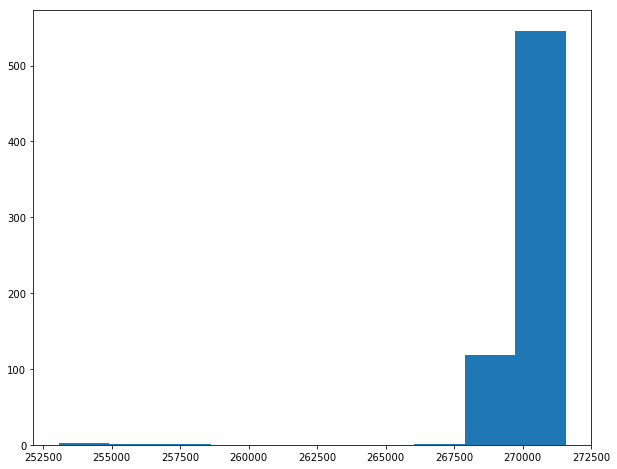

In [16]:
plt.hist(X_train.loc[:,'delta1'])
#X_train

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import jj_basic_fn as JJ


# 1:svm.SVC, 2:svm.LinearSVC, 3:OneVsRestClassifier, 4:svm.SVC+probability=True
               # 5:GaussianNaiveBayes, 6:LogisticRegression, 7:LinearDiscriminantAnalysis
def parameter_tuning(X_train, X_test, y_train, y_test, classifier, C_range_num = 2, 
                     nfold = 10, if_save = 0):
    #defs is a dictionary to initiate classifier with the parameters that don't need to be tuned
    defs = {}
    defs['classifier'] = classifier
    
    num_instances, num_features = X_train.shape[0], X_train.shape[1]
    n_fold = 10

    skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
    CV = skf.split(np.zeros(len(y_train)), y_train)
    C_range = 10 ** np.random.uniform(-3, 1, size = C_range_num)
    if classifier == 1: 
        clf_name = 'SVM'
        defs['class_weight'] = 'balanced'
        kernel_list = ['poly']    
        gamma_list = [2**i*1/num_features for i in range(2)]
        degree_list = [2,3,4,5]
        tuned_params = dict(kernel=kernel_list,gamma = gamma_list, degree = degree_list, C=C_range)
    elif classifier==2:
        clf_name = 'Logistic Regression'
        defs['class_weight'] = 'balanced'
        defs['max_iter'] = 200
        defs['penalty'] = 'l1'
        tuned_params = dict(penalty=['l1','l2'], C=C_range)

    elif classifier==3:
        clf_name = 'Gaussian Naive Bayes classifier'
        prr = np.ones(2) * (1.0/2)
        defs['priors'] = prr


    elif classifier==7:
        clf_name = 'Linear Discriminant Analysis'
        prr = np.ones(len(class_labels)) * (1.0/len(class_labels))
        defs['solver'] = 'eigen'  # 'svd', 'lsqr', 'eigen'
        defs['shrinkage'] = 'auto'
        defs['priors'] = prr
    clf_try = JJ.clf_list(defs)


    clf_grid = GridSearchCV(clf_try,
                            param_grid=tuned_params,
                            cv=CV,
                            scoring = 'roc_auc',
                            verbose=1,
                           return_train_score = True)
    clf_grid.fit(X_train, y_train)
    print('Best score: {}'.format(clf_grid.best_score_))
    print('Best parameters: {}'.format(clf_grid.best_params_))

    clf_best = clf_grid.best_estimator_

    y_pred = clf_best.predict(X_test)
    df = pd.DataFrame(clf_grid.cv_results_)
    show_result(y_pred, df, clf_name, if_save = if_save)
        
    if if_save:
        JJ.save_object(df, 'result_df_for_' + str(clf_name) + '.p')
        JJ.save_object(clf_best, 'best_estimator_for_' + str(clf_name) + '.p')
        JJ.save_object(clf_grid.best_score_, 'Best_score_for_' + str(clf_name) + '.p')
        JJ.save_object(clf_grid.best_params_, 'best_params_for_' + str(clf_name) + '.p')




In [14]:
#logistic regression
#parameter_tuning(X_train, X_test, y_train, y_test, classifier = 2, C_range_num = 3, if_save = 0)


In [ ]:
parameter_tuning(X_train, X_test, y_train, y_test, classifier = 1, C_range_num = 5, if_save = 0)


Fitting 10 folds for each of 40 candidates, totalling 400 fits
